In [4]:
import numpy as np
import pandas as pd
import tifffile
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import glob
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [5]:
PATH = 'data/crops_basal_ko_glut4_irap'
files = glob.glob(PATH+'/*.tif')
x = np.array([])
y = np.array([])
for file in files:
    im = tifffile.imread(file)
    x = np.append(x, im[0].flatten())
    y = np.append(y, im[1].flatten())

Text(0.5, 1.0, 'data/crops_basal_ko_glut4_irap')

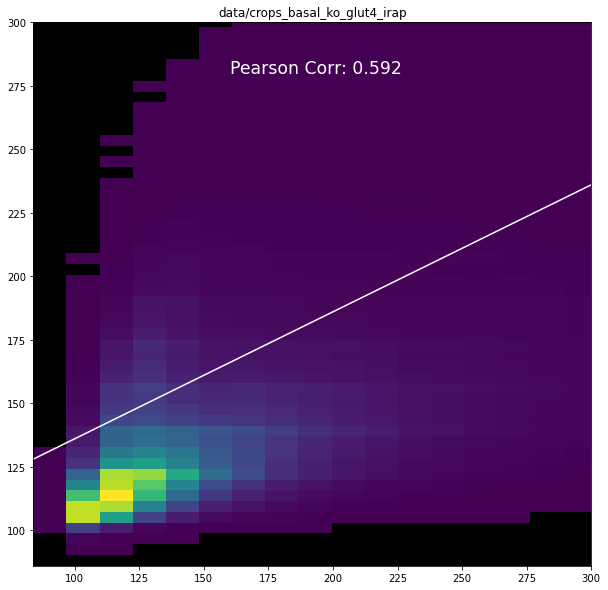

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('black')
ax.hist2d(x, y, bins=500, cmin=10, cmap='viridis')
x_line = np.linspace(np.min(x), np.max(x), 1000)
y_line = 0.5*x_line + np.min(y)
ax.plot(x_line, y_line, c='white')
ax.text(160,280, f'Pearson Corr: {stats.pearsonr(x.flatten(), y.flatten())[0]:0.3f}', 
        color='white', fontsize='xx-large')
ax.set_xlim([np.min(x),300])
ax.set_ylim([np.min(y),300])
ax.set_title(F'{PATH}')

In [5]:
if not os.path.exists(f'statistics/{PATH}'):
    os.mkdir(f'statistics/{PATH}')
fig.savefig(f'statistics/{PATH}/correlation.png')

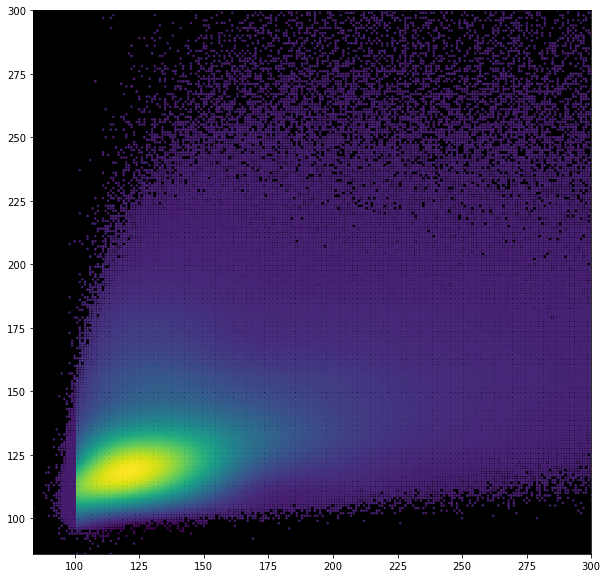

In [10]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(10,10))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2, **kwargs )
    ax.set_xlim([np.min(x),300])
    ax.set_ylim([np.min(y),300])
    ax.set_facecolor('black')
    #norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    #cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    #cbar.ax.set_ylabel('Density')

    return fig, ax


if "__main__" == __name__ :

    density_scatter( x, y, bins = [200,200] )